In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [6]:
df = pd.read_csv("loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [14]:
# Mostrando o shape (dimensões) do DataFrame
print("Dimensões do DataFrame:")
print(df.shape)
print("\n")

# Mostrando as colunas
print("Colunas do DataFrame:")
print(df.columns)
print("\n")

# Mostrando os tipos de dados
print("Tipos de dados de cada coluna:")
print(df.dtypes)
print("\n")

# Mostrando informações gerais do DataFrame
print("Informações gerais do DataFrame:")
df.info()


Dimensões do DataFrame:
(45000, 14)


Colunas do DataFrame:
Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')


Tipos de dados de cada coluna:
person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         

In [15]:
# Convertendo a coluna person_age para int
df['person_age'] = df['person_age'].astype(int)


In [17]:
# Identificando colunas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Exibindo contagens absolutas para cada coluna categórica
print("Análise das colunas categóricas:")
for column in categorical_columns:
    print(f"\n{column}:")
    print(df[column].value_counts())
    print("Número de valores únicos:", df[column].nunique())
    print("---")


Análise das colunas categóricas:

person_gender:
person_gender
male      24841
female    20159
Name: count, dtype: int64
Número de valores únicos: 2
---

person_education:
person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64
Número de valores únicos: 5
---

person_home_ownership:
person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64
Número de valores únicos: 4
---

loan_intent:
loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64
Número de valores únicos: 6
---

previous_loan_defaults_on_file:
previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64
Número de valores únicos: 2
---


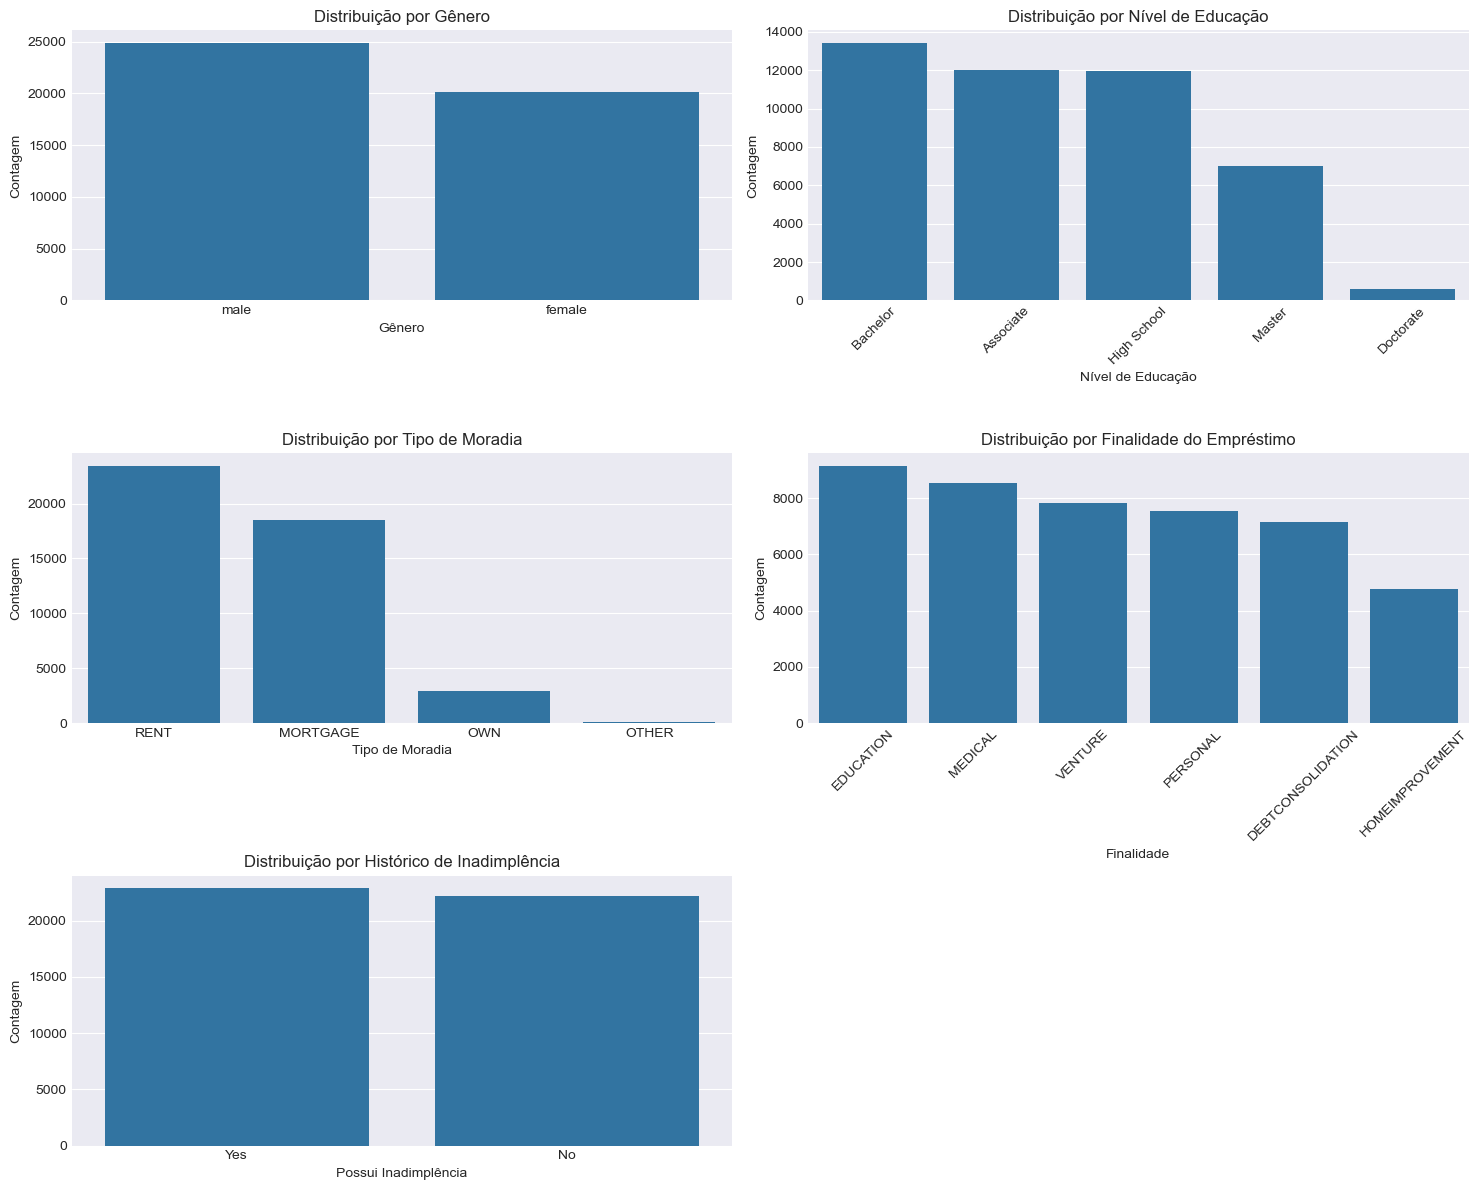

In [20]:
# Configurando o estilo e tamanho dos gráficos
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
# Gráfico para Gênero
sns.barplot(ax=axes[0,0],
           x=df['person_gender'].value_counts().index,
           y=df['person_gender'].value_counts().values)
axes[0,0].set_title('Distribuição por Gênero')
axes[0,0].set_xlabel('Gênero')
axes[0,0].set_ylabel('Contagem')

# Gráfico para Educação
sns.barplot(ax=axes[0,1],
           x=df['person_education'].value_counts().index,
           y=df['person_education'].value_counts().values)
axes[0,1].set_title('Distribuição por Nível de Educação')
axes[0,1].set_xlabel('Nível de Educação')
axes[0,1].set_ylabel('Contagem')
axes[0,1].tick_params(axis='x', rotation=45)

# Gráfico para Tipo de Moradia
sns.barplot(ax=axes[1,0],
           x=df['person_home_ownership'].value_counts().index,
           y=df['person_home_ownership'].value_counts().values)
axes[1,0].set_title('Distribuição por Tipo de Moradia')
axes[1,0].set_xlabel('Tipo de Moradia')
axes[1,0].set_ylabel('Contagem')

# Gráfico para Finalidade do Empréstimo
sns.barplot(ax=axes[1,1],
           x=df['loan_intent'].value_counts().index,
           y=df['loan_intent'].value_counts().values)
axes[1,1].set_title('Distribuição por Finalidade do Empréstimo')
axes[1,1].set_xlabel('Finalidade')
axes[1,1].set_ylabel('Contagem')
axes[1,1].tick_params(axis='x', rotation=45)

# Gráfico para Histórico de Inadimplência
sns.barplot(ax=axes[2,0],
           x=df['previous_loan_defaults_on_file'].value_counts().index,
           y=df['previous_loan_defaults_on_file'].value_counts().values)
axes[2,0].set_title('Distribuição por Histórico de Inadimplência')
axes[2,0].set_xlabel('Possui Inadimplência')
axes[2,0].set_ylabel('Contagem')

# Removendo o último subplot vazio
axes[2,1].remove()

# Ajustando o layout
plt.tight_layout()
plt.show()

C:\Users\mpach\AppData\Local\Temp\ipykernel_19664\911090683.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels([f'${x:,.0f}' for x in axes[idx].get_xticks()])
C:\Users\mpach\AppData\Local\Temp\ipykernel_19664\911090683.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels([f'${x:,.0f}' for x in axes[idx].get_xticks()])
C:\Users\mpach\AppData\Local\Temp\ipykernel_19664\911090683.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[idx].set_xticklabels([f'{x:.1f}%' for x in axes[idx].get_xticks()])


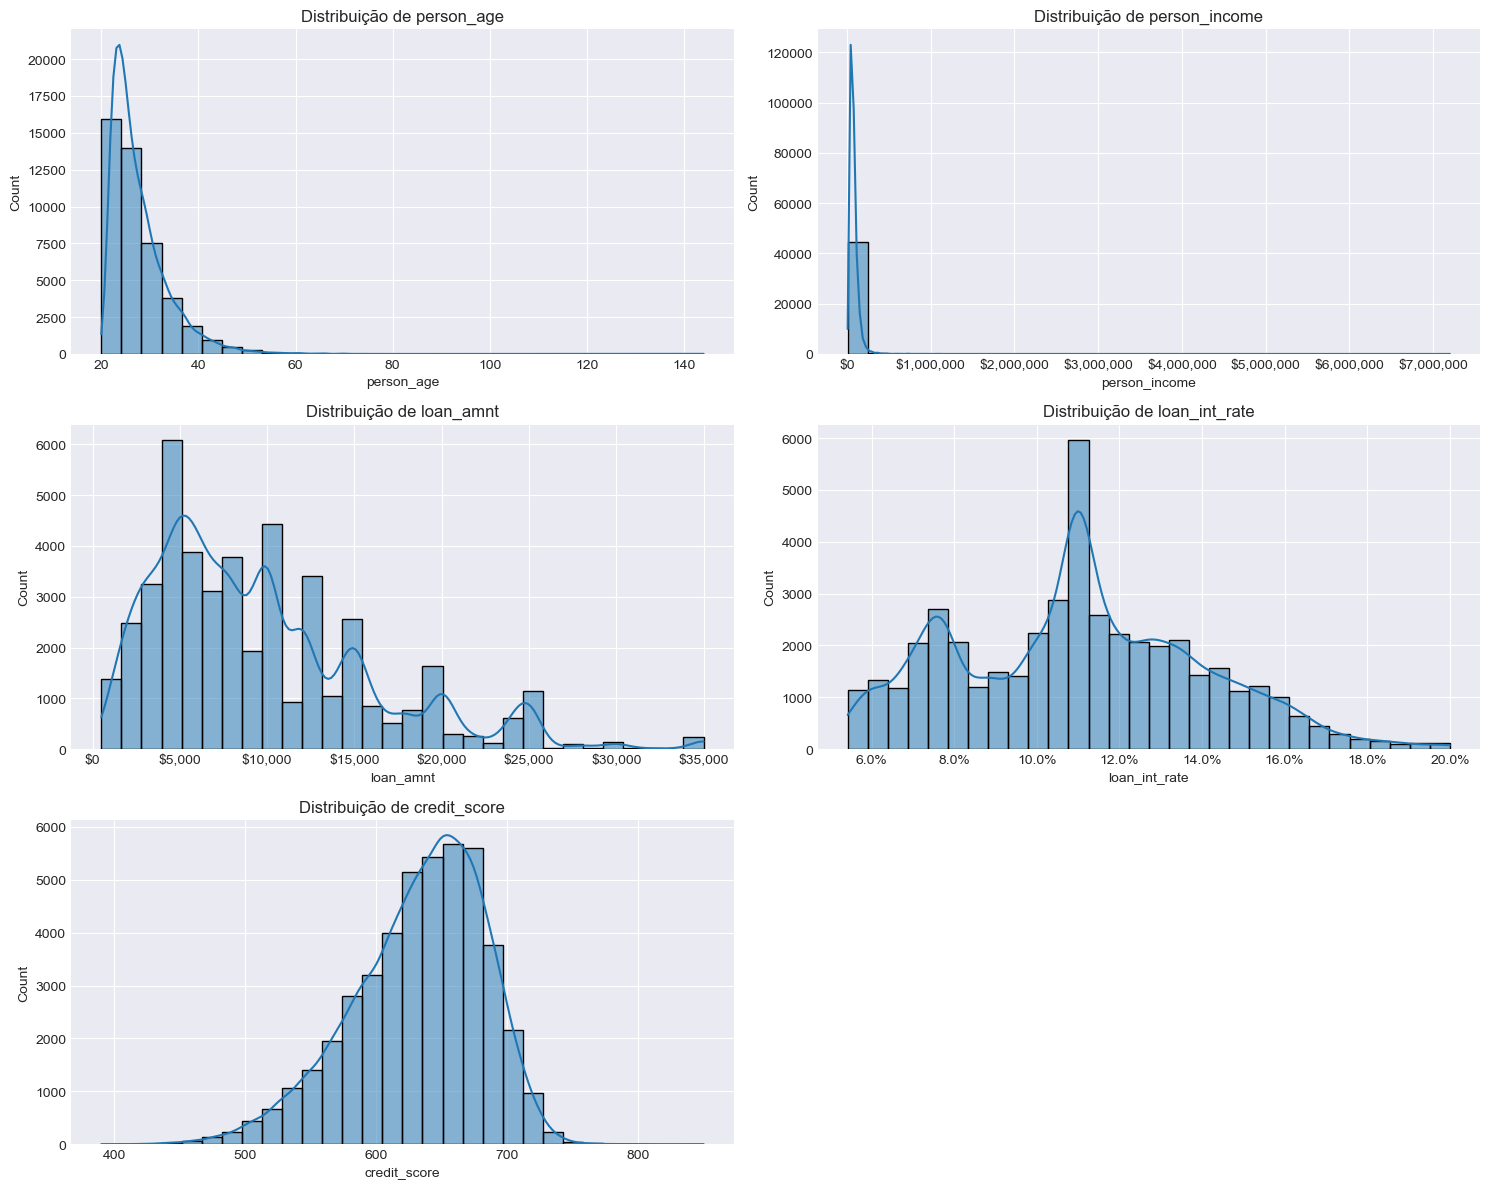


Estatísticas básicas das variáveis numéricas:
       person_age  person_income  loan_amnt  loan_int_rate  credit_score
count    45000.00       45000.00   45000.00       45000.00      45000.00
mean        27.76       80319.05    9583.16          11.01        632.61
std          6.05       80422.50    6314.89           2.98         50.44
min         20.00        8000.00     500.00           5.42        390.00
25%         24.00       47204.00    5000.00           8.59        601.00
50%         26.00       67048.00    8000.00          11.01        640.00
75%         30.00       95789.25   12237.25          12.99        670.00
max        144.00     7200766.00   35000.00          20.00        850.00


In [24]:
# Selecionando as colunas numéricas principais
numeric_cols = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'credit_score']

# Criando subplots para cada coluna numérica
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Achatando o array de axes para facilitar a iteração
axes = axes.ravel()

# Criando histogramas
for idx, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, ax=axes[idx], bins=30, kde=True)
    axes[idx].set_title(f'Distribuição de {col}')
    
    # Formatando eixos para valores monetários
    if col in ['person_income', 'loan_amnt']:
        axes[idx].set_xticklabels([f'${x:,.0f}' for x in axes[idx].get_xticks()])
    
    # Formatando eixos para percentuais
    if col == 'loan_int_rate':
        axes[idx].set_xticklabels([f'{x:.1f}%' for x in axes[idx].get_xticks()])

# Removendo o último subplot vazio
axes[-1].remove()

# Ajustando o layout
plt.tight_layout()
plt.show()

# Mostrando estatísticas básicas
print("\nEstatísticas básicas das variáveis numéricas:")
print(df[numeric_cols].describe().round(2))

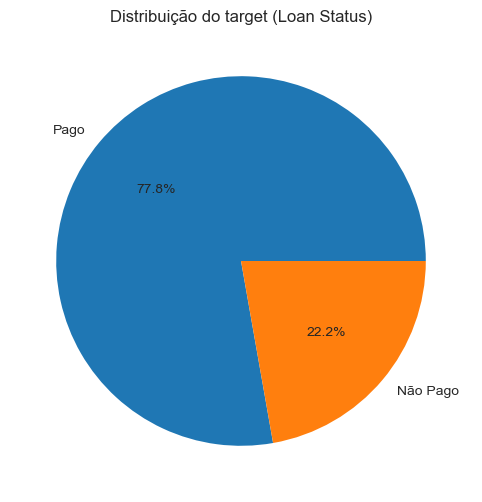

In [29]:
# Criando um gráfico de pizza para mostrar a distribuição da variável alvo (loan_status)
plt.figure(figsize=(10, 6))
loan_status_counts = df['loan_status'].value_counts()
plt.pie(loan_status_counts, labels=['Pago', 'Não Pago'], autopct='%1.1f%%')
plt.title('Distribuição do target (Loan Status)')

plt.show()


Relatório de Outliers:
--------------------------------------------------------------------------------

Coluna: person_age
Total de outliers: 2188
Percentual de outliers: 4.86%
Limite inferior: 15.00
Limite superior: 39.00


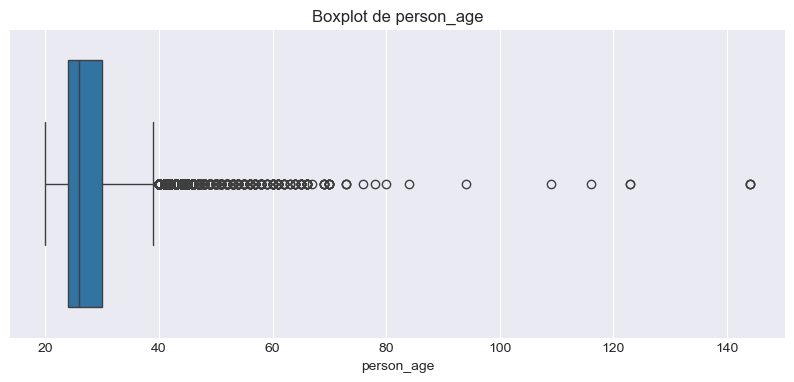


Coluna: person_income
Total de outliers: 2218
Percentual de outliers: 4.93%
Limite inferior: -25673.88
Limite superior: 168667.12


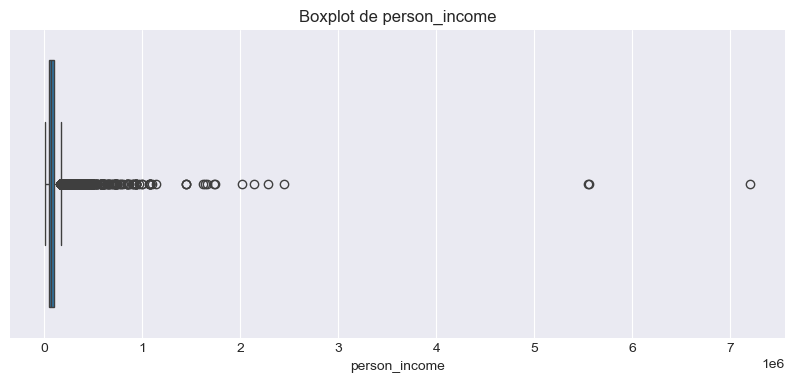


Coluna: loan_amnt
Total de outliers: 2348
Percentual de outliers: 5.22%
Limite inferior: -5855.88
Limite superior: 23093.12


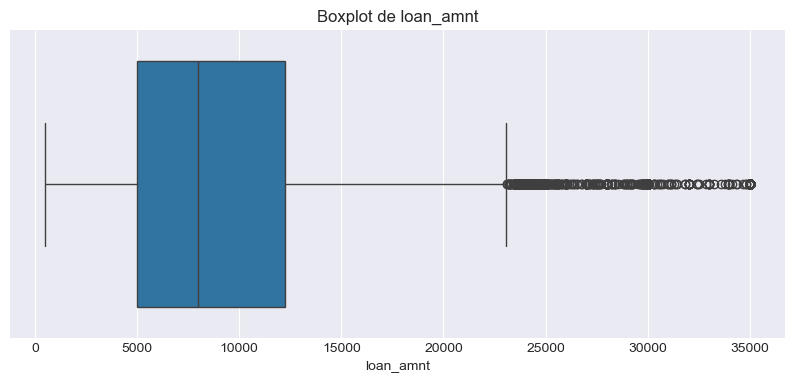


Coluna: loan_int_rate
Total de outliers: 124
Percentual de outliers: 0.28%
Limite inferior: 1.99
Limite superior: 19.59


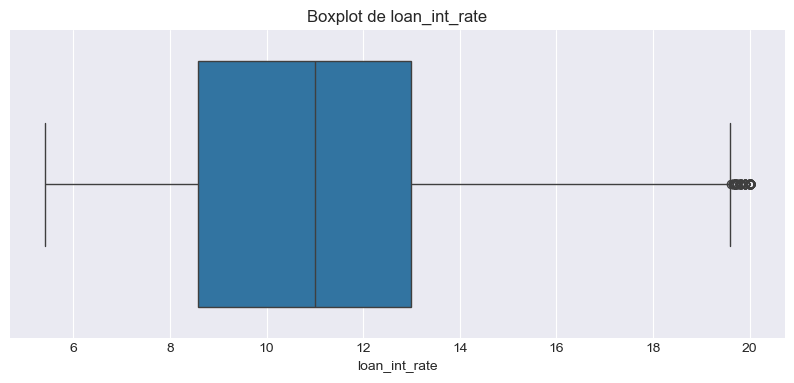


Coluna: credit_score
Total de outliers: 467
Percentual de outliers: 1.04%
Limite inferior: 497.50
Limite superior: 773.50


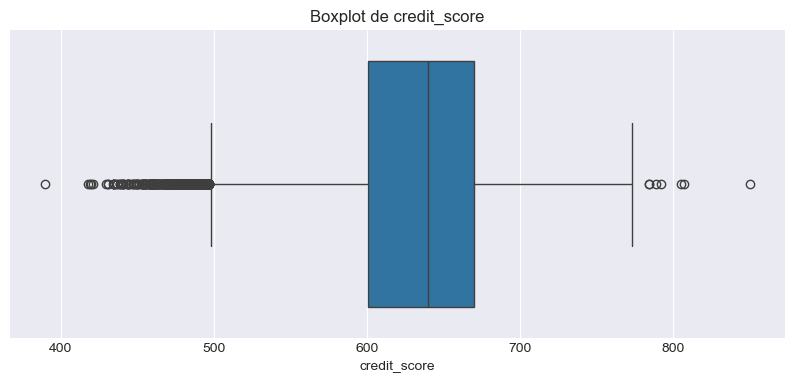

In [30]:
# Detectando outliers usando o método IQR (Interquartile Range)
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return {
        'coluna': column,
        'total_outliers': len(outliers),
        'percentual_outliers': (len(outliers) / len(df)) * 100,
        'limite_inferior': lower_bound,
        'limite_superior': upper_bound
    }

# Analisando outliers nas colunas numéricas
numeric_cols = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'credit_score']
outliers_report = []

print("\nRelatório de Outliers:")
print("-" * 80)

for col in numeric_cols:
    result = detect_outliers(df, col)
    print(f"\nColuna: {result['coluna']}")
    print(f"Total de outliers: {result['total_outliers']}")
    print(f"Percentual de outliers: {result['percentual_outliers']:.2f}%")
    print(f"Limite inferior: {result['limite_inferior']:.2f}")
    print(f"Limite superior: {result['limite_superior']:.2f}")
    
    # Criando boxplot para visualização
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


In [ ]:
colunas_assimetricas = ['person_income', 'loan_amnt', 'loan_int_rate']
colunas_simetricas = ['person_age', 'credit_score']
